In [ ]:
import torch

#Basic

In [ ]:
a=torch.tensor([[1.,2.],[3.,4.]])
print("a:",a)
print("size of a:", a.shape)
b=torch.tensor([[5.,6.],[7.,8.]])
print("b:",b)
print("size of b:",b.size())

a: tensor([[1., 2.],
        [3., 4.]])
size of a: torch.Size([2, 2])
b: tensor([[5., 6.],
        [7., 8.]])
size of b: torch.Size([2, 2])


In [ ]:
print("a+b:", a + b)
print("a-b:", a - b)
print("a*b:", a * b)
print("a/b:", a / b)

print("matmul:", torch.matmul(a,b))
print("mm:", a.mm(b))

a+b: tensor([[ 6.,  8.],
        [10., 12.]])
a-b: tensor([[-4., -4.],
        [-4., -4.]])
a*b: tensor([[ 5., 12.],
        [21., 32.]])
a/b: tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
matmul: tensor([[19., 22.],
        [43., 50.]])
mm: tensor([[19., 22.],
        [43., 50.]])


#GPU Tensor (Check Time)

In [ ]:
import time	#시간 측정 코드

CPU

In [ ]:
a = torch.rand(10000,10000)
b = torch.rand(10000,10000)

startTime = time.time() 	# 시작 시간 저장

a.matmul(b)	# 작업 코드
 
# 현재시각 - 시작시간 = 실행 시간 (ms)
print("elapsed time: %.2f ms" % ((time.time() - startTime)*1000))

elapsed time: 26835.22 ms


CUDA

In [ ]:
a = a.cuda()
b = b.cuda()

startTime = time.time() 	# 시작 시간 저장
 
a.matmul(b)	# 작업 코드
 
# 현재시각 - 시작시간 = 실행 시간 (ms)
print("elapsed time: %.2f ms" % ((time.time() - startTime)*1000))

elapsed time: 0.53 ms


#Autograd
자동-미분 기능 제공 (Back Propagation)

Check Device (CPU or GPU)

In [ ]:
import torch

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print(DEVICE)

cuda


Model

In [ ]:
BATCH_SIZE = 64
INPUT_SIZE = 1000
HIDDEN_SIZE = 100
OUTPUT_SIZE = 10

In [ ]:
x = torch.randn(BATCH_SIZE, 
                INPUT_SIZE, 
                device = DEVICE, 
                dtype = torch.float, 
                requires_grad = False)  
print("size of x:", x.size())

y = torch.randn(BATCH_SIZE, 
                OUTPUT_SIZE, 
                device = DEVICE,
                dtype = torch.float, 
                requires_grad = False)  
print("size of y:", y.size())

#weight
w1 = torch.randn(INPUT_SIZE, 
                 HIDDEN_SIZE, 
                 device = DEVICE, 
                 dtype = torch.float,
                 requires_grad = True)  
print("size of w1:", w1.size())

w2 = torch.randn(HIDDEN_SIZE,
                 OUTPUT_SIZE, 
                 device = DEVICE,
                 dtype = torch.float,
                 requires_grad = True)
print("size of w2:", w2.size())  

size of x: torch.Size([64, 1000])
size of y: torch.Size([64, 10])
size of w1: torch.Size([1000, 100])
size of w2: torch.Size([100, 10])


In [ ]:
learning_rate = 1e-6
for t in range(1, 1001):
    y_pred = x.mm(w1).clamp(min = 0).mm(w2)

    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 0:
        print("Iteration: ", t, "\t", "Loss: ", loss.item())
    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        w1.grad.zero_()
        w2.grad.zero_()

Iteration:  100 	 Loss:  3.2648604246787727e-06
Iteration:  200 	 Loss:  2.9706939130846877e-06
Iteration:  300 	 Loss:  2.6519796847424004e-06
Iteration:  400 	 Loss:  2.4657042558828834e-06
Iteration:  500 	 Loss:  2.23881215788424e-06
Iteration:  600 	 Loss:  2.020527517743176e-06
Iteration:  700 	 Loss:  1.924555363075342e-06
Iteration:  800 	 Loss:  1.7750940060068388e-06
Iteration:  900 	 Loss:  1.6836067970871227e-06
Iteration:  1000 	 Loss:  1.5678955378461978e-06


#Example

In [ ]:
import torch
torch.__version__

import numpy as np
import matplotlib.pyplot as plt

from torch.autograd import Variable

# 학습 데이터
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167, 7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221, 2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

def plot_variable(x,y,z='',**kwargs):
    l = []
    for a in [x,y]:
        l.append(a.data.numpy())
    plt.plot(l[0],l[1],z,**kwargs)

def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data


def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

tensor(1337.7030)
tensor(3.6443)
tensor(3.6026)
tensor(3.5627)
tensor(3.5244)
tensor(3.4876)
tensor(3.4524)
tensor(3.4185)
tensor(3.3861)
tensor(3.3549)


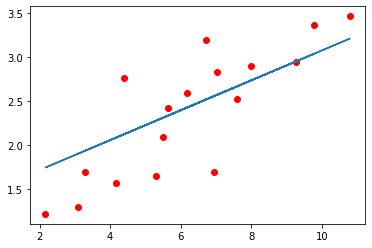

In [ ]:
learning_rate = 1e-4

x,y = get_data()               # x - 학습 데이터, y - 목적 변수(Target Variables)
w,b = get_weights()           # w,b - 학습 파라미터
for i in range(500):
    y_pred = simple_network(x) # wx + b를 계산하는 함수
    loss = loss_fn(y,y_pred)   # y와 y_pred의 차의 제곱 합을 계산
    if i % 50 == 0: 
        print(loss)
    optimize(learning_rate)    # 오차를 최소화하도록 w, b를 조정

plot_variable(x,y,'ro')
plot_variable(x,y_pred,label='Fitted line')

#MNIST_MLP
프응5주차~ 

Module Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

Check Device

In [ ]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 1.9.0+cu111  Device: cuda


Hyper parameter

In [ ]:
BATCH_SIZE = 32     # (중간고사) Q. BATCH_SIZE가 의미하는 것은?
EPOCHS = 10         #어디서 끝날지 보는 것. 원하는 값으로 설정

Download Mnist DB

In [ ]:
!pwd                #다운받는 위치

/content


In [ ]:
!ls

sample_data


In [ ]:
train_dataset = datasets.MNIST(root = "./data/MNIST",               #다운받을 위치
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "./data/MNIST",
                              train = False,
                              transform = transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Dataloader

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)          #셔플 해주기

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)          #셔플 굳이 할 필요 없음

Check Data

In [ ]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())      #결과 [배치사이즈 32, 
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


Show Data

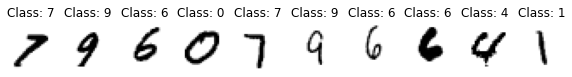

In [ ]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))

Model

In [ ]:
class Net(nn.Module):                       ###요부분 수정?  #전체적인 네트워크 구조
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.3

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob) ###
        x = self.fc2(x)
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob) ###
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [ ]:
Net()

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

Optimizer, Objective Function

In [ ]:
#안외워도됨     Q.SGD를 Adam으로 바꾸세요
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


Train

In [ ]:
def train(model, train_loader, optimizer, log_interval):
    model.train()                #*train할때만 쓰이는 것들이 있기 때문에
    for batch_idx, (image, label) in enumerate(train_loader):               
       #loss 등등.. 의미하는 것들 다 알아두기
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))

Validation (Evaluation)

In [ ]:
def evaluate(model, test_loader):
    model.eval()                #*train할때만 쓰이는 것들이 있기 때문에
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

Run

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))         
      #train loss랑 test loss랑 비슷하게 떨어져야함
      #한쪽은 덜 떨어지면 overfitting된것이므로 일반화시켜줘야함

#Chapter 3

##MNIST_MLP with Dropout

**Model** with Dropout

In [ ]:
class Net(nn.Module):               #전체적인 네트워크구조
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5                                           ###

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob) ###
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob) ###
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

Optimizer, Objective Function

In [ ]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


Run

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.367265
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 2.291527
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 2.408723
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 2.359298
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 2.336603


KeyboardInterrupt: ignored

##MNIST_MLAP with Dropout+ReLU

Model with Dropout + ReLU

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        #fc1,fc2, fc3....많아지면 overfiting 위험 (많다고 좋지 않음)
        self.dropout_prob = 0.5

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)   ###
        x = F.dropout(x, training = self.training, p = self.dropout_prob)   #
        x = self.fc2(x)
        x = F.relu(x)   ###
        x = F.dropout(x, training = self.training, p = self.dropout_prob)   #
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

Optimizer, Objective Function

In [ ]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
Net()


Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

Run

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.301474
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 2.103349
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 1.156636


KeyboardInterrupt: ignored

##MNIST_MLAP with Dropout+ReLU+BN

Model with Dropout + ReLU + BN


In [ ]:
class Net(nn.Module):               #의미하는거 다 알아야함
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5
        self.batch_norm1 = nn.BatchNorm1d(512)  ###
        self.batch_norm2 = nn.BatchNorm1d(256)  ###

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.batch_norm1(x)                 ###
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)   #
        x = self.fc2(x)
        x = self.batch_norm2(x)                 ###
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)   #
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

Optimizer, Objective Function

In [ ]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()               #CrossEntropyLoss()랑 softmax랑 세트?

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


Run

In [ ]:
# Q.loss랑 accuracy가 의미하는것  #loss랑 accuracy의 관계가 무조건 비례하는건 아님 

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)         #loss를 잘 설정해야함
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.394315
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 0.923454
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 0.343373
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 0.283908
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 0.313150
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 0.542978
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 0.287622
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 0.387177
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 0.217328
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 0.683763

[EPOCH: 1], 	Test Loss: 0.1587, 	Test Accuracy: 95.27 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 0.190471
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 0.269483
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 0.113377
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 0.356315
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 0.282527
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 0.271394
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 0.310247
T

##MNIST_MLAP with Dropout+ReLU+BN+He

Model with Dropout + ReLU + BN


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5
        self.batch_norm1 = nn.BatchNorm1d(512)   #
        self.batch_norm2 = nn.BatchNorm1d(256)   #

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.batch_norm1(x)            #     
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)     #
        x = self.fc2(x)
        x = self.batch_norm2(x)           #
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)     #
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

Optimizer, Objective Function with He initialization

In [ ]:
import torch.nn.init as init                    ######
def weight_init(m):                             ######
    if isinstance(m, nn.Linear):                ######
        init.kaiming_uniform_(m.weight.data)    ######

model = Net().to(DEVICE)
model.apply(weight_init)                        ######
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()               #CrossEntropyLoss()랑 softmax랑 세트?

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


Run

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 3.568795
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 1.122213
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 0.756970
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 0.598212
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 0.655425
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 0.650983
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 0.208038
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 0.296391
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 0.355472
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 0.375899

[EPOCH: 1], 	Test Loss: 0.2208, 	Test Accuracy: 93.39 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 0.397414
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 0.428338
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 0.585598
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 0.502462
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 0.133595
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 0.329559
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 0.116753
T

KeyboardInterrupt: ignored

##MNIST_MLAP with Dropout+ReLU+BN+He+Adam

Model with Dropout + ReLU + BN


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5
        self.batch_norm1 = nn.BatchNorm1d(512)     #
        self.batch_norm2 = nn.BatchNorm1d(256)     #

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.batch_norm1(x)         #           
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)     #
        x = self.fc2(x)
        x = self.batch_norm2(x)         #
        x = F.relu(x)
        x = F.dropout(x, training = self.training, p = self.dropout_prob)     #
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

Optimizer, Objective Function with He initialization + Adam Optimizer

In [ ]:
import torch.nn.init as init                    
def weight_init(m):                             
    if isinstance(m, nn.Linear):                
        init.kaiming_uniform_(m.weight.data)    

model = Net().to(DEVICE)
model.apply(weight_init)                        
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01) ###
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


Run

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.882394
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 0.535795
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 0.246878
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 0.556635
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 0.153855
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 0.200153
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 0.359648
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 0.291207
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 0.311451
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 0.141895

[EPOCH: 1], 	Test Loss: 0.1232, 	Test Accuracy: 96.15 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 0.087119
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 0.275130
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 0.396597
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 0.814583
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 0.241010
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 0.145245
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 0.428120
T

KeyboardInterrupt: ignored

##AutoEncoder

Module Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

Check Device (CPU or GPU)

In [ ]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 1.9.0+cu111  Device: cuda


Hyper parameter

In [ ]:
BATCH_SIZE = 32
EPOCHS = 10

Download FashionMNIST DB

In [ ]:
train_dataset = datasets.FashionMNIST(root = "./data/FashionMNIST",
                                      train = True,
                                      download = True,
                                      transform = transforms.ToTensor())

test_dataset = datasets.FashionMNIST(root = "./data/FashionMNIST",
                                     train = False,
                                     transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



Check Data

In [ ]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


Show Data

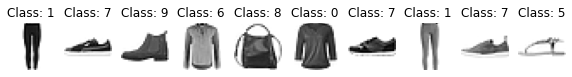

In [ ]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))

Design Model

In [ ]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 32),)
        
        self.decoder = nn.Sequential(
            nn.Linear(32, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28 * 28),)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

Optimizer, Objective Function

In [ ]:
model = AE().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.MSELoss()

print(model)

AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=32, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
  )
)


Train

In [ ]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, _) in enumerate(train_loader):
        image = image.view(-1, 28 * 28).to(DEVICE)
        target = image.view(-1, 28 * 28).to(DEVICE)
        optimizer.zero_grad()
        encoded, decoded = model(image)
        loss = criterion(decoded, target)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))

Validation (Evaluation)

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    real_image = []
    gen_image = []
    with torch.no_grad():
        for image, _ in test_loader:
            image = image.view(-1, 28 * 28).to(DEVICE)
            target = image.view(-1, 28 * 28).to(DEVICE)
            encoded, decoded = model(image)
            
            test_loss += criterion(decoded, image).item()
            real_image.append(image.to("cpu"))
            gen_image.append(decoded.to("cpu"))
            
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)

    return test_loss, real_image, gen_image

Run

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 0.226879
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 0.029382
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 0.024651
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 0.020563
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 0.020009
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 0.017568
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 0.015927
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 0.016156
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 0.017064
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 0.012308

[EPOCH: 1], 	Test Loss: 0.0154


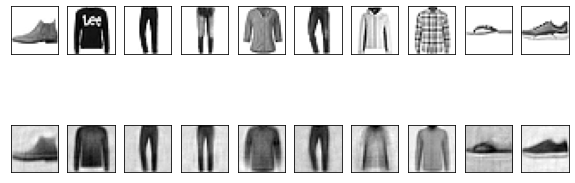

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 0.015839
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 0.015817
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 0.012423
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 0.013227
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 0.013887


KeyboardInterrupt: ignored

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, real_image, gen_image = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}".format(epoch, test_loss))
    f, a = plt.subplots(2, 10, figsize = (10, 4))
    for i in range(10):
        img = np.reshape(real_image[0][i], (28, 28))
        a[0][i].imshow(img, cmap = "gray_r")
        a[0][i].set_xticks(())
        a[0][i].set_yticks(())
    
    for i in range(10):
        img = np.reshape(gen_image[0][i], (28, 28))
        a[1][i].imshow(img, cmap = "gray_r")
        a[1][i].set_xticks(())
        a[1][i].set_yticks(())
    plt.show()

#Chapter 4. Computer Vision

##CIFAR_MLP

Module Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

Check Device

In [2]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 1.9.0+cu111  Device: cuda


Hyper Parameter

In [3]:
BATCH_SIZE = 32
EPOCHS = 10

Download Data

In [5]:
train_dataset = datasets.CIFAR10(root = "./data/CIFAR_10",
                                  train = True,
                                  download = True,
                                  transform = transforms.ToTensor())

test_dataset = datasets.CIFAR10(root = "./data/CIFAR_10",
                                train = False,
                                transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle = True)   
##shuffle하는 이유는 데이터분포가 어떻게 돼있는지 모르므로 제대로 학습안될수있음 ->섞어주기
                                          
                                          ##시험!! shuffle 하는거, 안하는거 

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)  ##shuffle true로 해도 상관없음!

Files already downloaded and verified


Check Data

In [12]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())   
    ##의미하는거!!시험!! 32는 배치사이즈, 3은 칼라이미지구나~(1이면 흑백이구나~)
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


Show Data

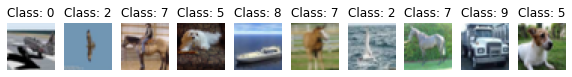

In [7]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('Class: ' + str(y_train[i].item()))

Design Model

In [15]:
class Net(nn.Module):  #이거보면 뭘 얘기(하는지 다 알아야함!
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)  #(이미지사이즈, 그냥 준거) (최초input, output) 
        #Linear가 의미하는건 fully connected layers(4장pdf3번째)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)   #(input, 마지막 output)
        #몇개만들지는 만드는 사람 마음

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)  #flatten
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

Optimizer, Objective Function

In [18]:
model = Net().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)  #Adam 옵티마이저   
#lr은 learning rate(학습률), (gradient에서?) 얼마만큼 움직일지 결정, 
criterion = nn.CrossEntropyLoss()  #

print(model)

Net(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


Train

In [19]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)  
        label = label.to(DEVICE)  #cuda에 올려서 계산하도록
        optimizer.zero_grad()
        output = model(image)  
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()  #최종적으로 업데이트

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))

Evaluation

In [20]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

Run

In [21]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000 (0%)]	Train Loss: 2.318444
Train Epoch: 1 [6400/50000 (13%)]	Train Loss: 1.744240
Train Epoch: 1 [12800/50000 (26%)]	Train Loss: 1.869980
Train Epoch: 1 [19200/50000 (38%)]	Train Loss: 1.863545
Train Epoch: 1 [25600/50000 (51%)]	Train Loss: 1.606253
Train Epoch: 1 [32000/50000 (64%)]	Train Loss: 1.720191
Train Epoch: 1 [38400/50000 (77%)]	Train Loss: 1.733750
Train Epoch: 1 [44800/50000 (90%)]	Train Loss: 1.907071

[EPOCH: 1], 	Test Loss: 1.7341, 	Test Accuracy: 37.43 % 

Train Epoch: 2 [0/50000 (0%)]	Train Loss: 1.658274
Train Epoch: 2 [6400/50000 (13%)]	Train Loss: 1.734447
Train Epoch: 2 [12800/50000 (26%)]	Train Loss: 1.889754
Train Epoch: 2 [19200/50000 (38%)]	Train Loss: 1.438174
Train Epoch: 2 [25600/50000 (51%)]	Train Loss: 1.621372
Train Epoch: 2 [32000/50000 (64%)]	Train Loss: 1.692730
Train Epoch: 2 [38400/50000 (77%)]	Train Loss: 1.724070
Train Epoch: 2 [44800/50000 (90%)]	Train Loss: 1.965339

[EPOCH: 2], 	Test Loss: 1.5976, 	Test Accuracy: 43.08 % 

##CIFAR_CNN

Design Model

In [24]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = 3, padding = 1) 
        #kernel_size = 3, padding = 1 원본사이즈 그대로 되는것 
        #kernel_size = 5, padding = 2 해도 그대로 됨

        #self.conv12 = nn.Conv2d(in_channels = 8, out_channels = 8, kernel_size = 3, padding = 1) 
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, padding = 1)
      

        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2) #연산자처럼 사용?
        # stride = 2는 kernel_size = 2였으니까 건너뛰려고 

        self.fc1 = nn.Linear(8 * 8 * 16, 64) #
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)
        
    def forward(self, x):
        x = self.conv1(x)  #32*32*3  -> 32*32*8
        x = F.relu(x)      #32*32*8
        x = self.pool(x)    #16*16*8
        x = self.conv2(x)     #16*16*8 ->16*16*16
        x = F.relu(x)     #16*16*16
        x = self.pool(x)    #8*8*16
        
        x = x.view(-1, 8 * 8 * 16)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x)
        return x

Optimizer, Objective Function

In [25]:
model = CNN().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

print(model)

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


Run

In [26]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/50000 (0%)]	Train Loss: 2.318655
Train Epoch: 1 [6400/50000 (13%)]	Train Loss: 2.270272
Train Epoch: 1 [12800/50000 (26%)]	Train Loss: 1.572780
Train Epoch: 1 [19200/50000 (38%)]	Train Loss: 1.894163
Train Epoch: 1 [25600/50000 (51%)]	Train Loss: 1.378533
Train Epoch: 1 [32000/50000 (64%)]	Train Loss: 1.627531
Train Epoch: 1 [38400/50000 (77%)]	Train Loss: 1.608759
Train Epoch: 1 [44800/50000 (90%)]	Train Loss: 1.360712

[EPOCH: 1], 	Test Loss: 1.4956, 	Test Accuracy: 46.13 % 

Train Epoch: 2 [0/50000 (0%)]	Train Loss: 1.485070
Train Epoch: 2 [6400/50000 (13%)]	Train Loss: 1.234751
Train Epoch: 2 [12800/50000 (26%)]	Train Loss: 1.683148
Train Epoch: 2 [19200/50000 (38%)]	Train Loss: 1.001611
Train Epoch: 2 [25600/50000 (51%)]	Train Loss: 1.572837
Train Epoch: 2 [32000/50000 (64%)]	Train Loss: 1.594668
Train Epoch: 2 [38400/50000 (77%)]	Train Loss: 1.123912
Train Epoch: 2 [44800/50000 (90%)]	Train Loss: 1.383872

[EPOCH: 2], 	Test Loss: 1.2986, 	Test Accuracy: 52.77 % 